# Assignment 4: Principal Component Analysis (PCA)
***
>**Group 10**<br>
**Names:** Harpreet Singh, Lilliam Norori Duarte

## Table of Contents
1. [Part 1: Manual PCA versus scikit-learn](#-Part-1:-Manual-PCA-versus-scikit-learn)<br>
    1.1. [Loading the dataset](#Loading-the-dataset)<br>
    1.2. [Computing the covariance matrix](#Computing-the-covariance-matrix)<br>
    1.3. [Manually Executing PCA vs. Sklearn PCA](#Manually-Executing-PCA-vs.-Sklearn-PCA)<br>
    1.4. [Plotting both methods](#Plotting-both-methods)<br>
    1.5. [Computing the expected output](#Computing-the-expected-output)<br>
2. [Part 2: PCA Using the Expanded Seeds Dataset](#Part-2:-PCA-Using-the-Expanded-Seeds-Dataset)<br>
    2.1. [Loading the dataset](#Loading-the-dataset.)<br>
    2.2. [Instantiating PCA model and fitting the model](#Instantiating-PCA-model-and-fitting-the-model)<br>
    2.3. [Creating a new PCA with n_component=1](#Creating-a-new-PCA-with-n_component=1)<br>
    2.4. [Restoring the compressed dataset](#Restoring-the-compressed-dataset)<br>

In [1]:
#Importing the required library packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D #Required for 3D plotting

### Part 1: Manual PCA versus scikit-learn
The aim of this activity is to dive into understanding how PCA works by doing it from scratch, and then comparing your implementation against the one included in scikit-learn to see whether there are any major differences.
>**By:** Harpreet Singh<br>
**Data Source:** [UCI Machine Learning Repository - Seeds Dataset](https://archive.ics.uci.edu/ml/datasets/seeds)

#### Loading the dataset

In [2]:
#2.
#Loading data from data file into pandas dataframe. Display first 5 rows
seed_df = pd.read_csv('Seed_Data.csv')  
seed_df = seed_df[['A', 'LK']]                  #'A' and 'LK' are the sepal features
seed_df.head()                                  #using head() which print first five rows of data by default

,A,LK
0,15.26,5.763
1,14.88,5.554
2,14.29,5.291
3,13.84,5.324
4,16.14,5.658


#### Computing the covariance matrix

In [3]:
#3.
#fetching the values from data using 'values' and doing transpose using 'T'\
cov_data = seed_df.values.T

#Computing the covarience using cov() function from numpy
cov_matrix = np.cov(cov_data) 
cov_matrix

array([[8.46635078, 1.22470367],
       [1.22470367, 0.19630525]])

>**Describe what is contained within the covariance matrix.**

This symmetric matrix shows the covariances for each pair of variables. These values in the covariance matrix represent the size and direction of the distribution of multivariate data in multidimensional space.

>**What information is given by the eigenvalues and eigenvectors of the covariance matrix, and how is this useful for PCA?**

**Eigenvalues:** The eigenvalues of the covariance matrix encode the variability of the data in an orthogonal basis, capturing as much of the variability of the data in the first few basis functions as is practicable (aka the principle component basis).

**Eigenvectors:** Directions are represented by eigenvectors. Consider using a multidimensional scatterplot to visualise your data, the data scatterplot can be conceived of as having a distinct "direction" for each eigenvector. Size or relevance are represented by eigenvalues.

**In PCA**, a feature's importance is inversely correlated with its eigenvalue. Therefore, we can choose only those features with higher eigenvalues and delete others in order to lower the dimensionality.

#### Manually Executing PCA vs. Sklearn PCA

In [4]:
#5.
#Transforming data using scikit-learn API
model = PCA(n_components=1)                         #here 'n_components' is number of components to keep,
                                                    #by default it took all the available components
#Storing transformed data in 'sklearn_pca' variable
sklearn_pca = model.fit_transform(seed_df.values)   

In [5]:
#6.
#computing eigenvectors and eigenvalues
eigenvectors, eigenvalues, _ = np.linalg.svd(cov_matrix, full_matrices=False)

#storing only first row because we want to use only first principal component
P = eigenvectors[0]       

#Storing transformed data in 'manual_pca' variable
manual_pca = P.dot(seed_df.values.T)

#### Plotting both methods

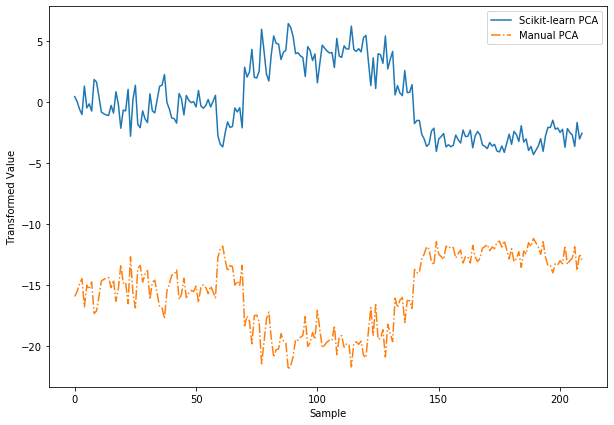

In [6]:
#7.
#Ploting the sklearn_pca and manual_pca values
plt.figure(figsize=(10, 7)) 
plt.plot(sklearn_pca, label='Scikit-learn PCA')
plt.plot(manual_pca, label='Manual PCA', linestyle='-.')
plt.xlabel('Sample')
plt.ylabel('Transformed Value')
plt.legend()
plt.show()

>**Notice that the two plots look almost identical, but with some key differences. What are these differences?**<br>

The two plots almost appear to be mirror images of one another, but there is actually an offset between them.

#### Computing the expected output
See whether you can modify the output of the manual PCA process to bring it in line with the scikit-learn version.

In [7]:
#9.Check for the differences between Manual PCA and Scikit-learn PCA
print("Principal component of sklearn_pca: ",model.components_)

print("\nPrincipal component of manual_pca: ",P)

Principal component of sklearn_pca:  [[0.98965371 0.14347657]]

Principal component of manual_pca:  [-0.98965371 -0.14347657]


>**Observations:**<br>
It can be noticed that the principal component values from both the pca's, but the signs are different which leading to the mirror image outcome on the plot. To resolve the issue, we can change the "manual_pca' values by multiplying them by '-1'.

In [8]:
#changing the manual conponent values
manual_pca *= -1

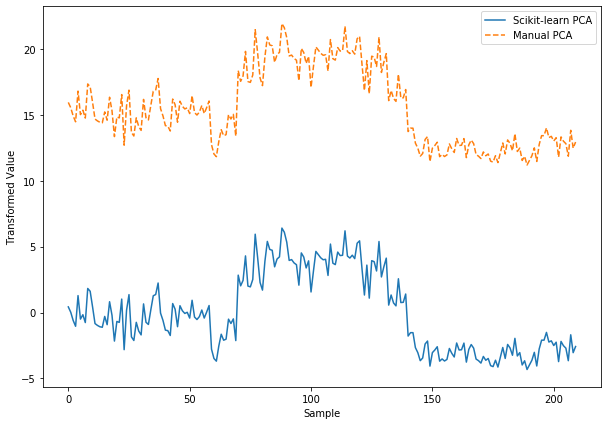

In [9]:
#Reploting the sklearn_pca and manual_pca values
plt.figure(figsize=(10, 7))
plt.plot(sklearn_pca, label='Scikit-learn PCA')
plt.plot(manual_pca, label='Manual PCA', linestyle='--')
plt.xlabel('Sample')
plt.ylabel('Transformed Value')
plt.legend()
plt.show()

>**Observations:**<br> Now, both lines on the plot looks exactly similar.
The offset between the two is all that remains to be addressed at this point. The mean of the data is subtracted before the transformation using the scikit-learn API. Before completing the transformation with manual PCA, we have to subtract the dataset's mean for each column:

In [10]:
#Computing the mean for each column
mean_values = np.mean(seed_df.values, axis=0)       #here axis=0 because we want to do mean for columns
offset_values = seed_df.values - mean_values
manual_pca = P.dot(offset_values.T)

#Changing the sign's of manual_pca values to avoid mirror imagge outcome
manual_pca *= -1

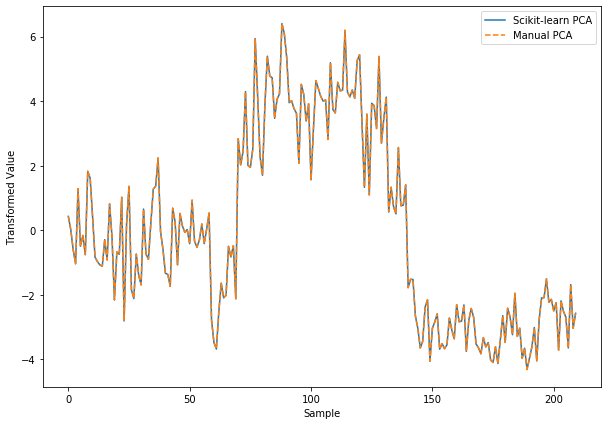

In [11]:
#Ploting the sklearn_pca and manual_pca values
plt.figure(figsize=(10, 7))
plt.plot(sklearn_pca, label='Scikit-learn PCA')
plt.plot(manual_pca, label='Manual PCA', linestyle='--')
plt.xlabel('Sample')
plt.ylabel('Transformed Value')
plt.legend()
plt.show()


The outcome plot will show that the dimensionality reduction achieved by the two approaches is identical. The two methods simply use a different feature as the baseline for comparison, therefore the differences are in the signs of the covariance matrices.

### Part 2: PCA Using the Expanded Seeds Dataset
This activity aims to simulate the process that is typically completed in a real-world problem as we try to determine the optimum number of components to select, attempting to balance the extent of dimensionality reduction and information loss.
>**By:** Lilliam Norori Duarte<br>
**Data Source:** [UCI Machine Learning Repository - Seeds Dataset](https://archive.ics.uci.edu/ml/datasets/seeds)

#### Loading the dataset

In [13]:
#2.Read in the dataset and select the Area of Kernel, Length of Kernel, and Compactness of Kernel columns.
df = pd.read_csv(r'C:\Users\Owner\Documents\RRC\F2022FA\UML\Week 1\Seed_Data.csv')[['A', 'LK', 'C']]
df.head()

,A,LK,C
0,15.26,5.763,0.8710
1,14.88,5.554,0.8811
2,14.29,5.291,0.9050
3,13.84,5.324,0.8955
4,16.14,5.658,0.9034


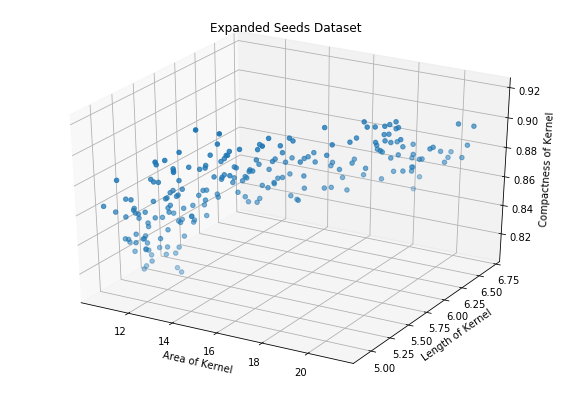

In [14]:
#3.Plot the data in three dimensions.
fig = plt.figure(figsize=(10, 7))
# Where Axes3D is required
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['A'], df['LK'], df['C'])
ax.set_xlabel('Area of Kernel')
ax.set_ylabel('Length of Kernel')
ax.set_zlabel('Compactness of Kernel')
ax.set_title('Expanded Seeds Dataset')
plt.show()

>**Observations:**<br> This plot describes 3 different measurements of kernels (Area, Length, Compactness) belonging to different varieties of wheat. The data looks sparse and seems to be linearly distributed.

#### Instantiating PCA model and fitting the model

In [15]:
#4.Create a PCA model without specifying the number of components.
model = PCA()

In [16]:
#5.Fit the model to the dataset.
model.fit(df.values)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [47]:
#6.Display the eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(np.cov(df.T))
eigenvalues

array([8.64410761e+00, 1.90087132e-02, 9.80531476e-05])

In [17]:
#6.Display the explained_variance_ratio_.
model.explained_variance_ratio_

array([9.97794495e-01, 2.19418709e-03, 1.13183333e-05])

>**How the explained variance ratio is calculated and explain what it means.**

The explained variance ratio is the percentage between the variance of that principal component and the total variance. It comparises the majority of the information within the data.

>**What is the minimum number of components required to keep 90% of the variance?**

Given the first component provides about 99.7% of the variance of the data set, the number of components can be narrowed down to 1.

#### Creating a new PCA with n_component=1

In [18]:
#8.Create a new PCA model with the number of components that keeps at least 90% of the variance.
model = PCA(n_components=1)

In [20]:
#9.Transform the data using the new model.
data_transformed = model.fit_transform(df.values)

In [35]:
data_transformed

array([[ 0.42749629],
       [ 0.02149526],
       [-0.60001127],
       [-1.04066174],
       [ 1.28347395],
       [-0.49736151],
       [-0.16525133],
       [-0.75970622],
       [ 1.82493148],
       [ 1.61271694],
       [ 0.42045929],
       [-0.83635087],
       [-0.97471655],
       [-1.07789696],
       [-1.11705951],
       [-0.29453783],
       [-0.92151687],
       [ 0.81935153],
       [-0.2065467 ],
       [-2.163252  ],
       [-0.67623604],
       [-0.74545056],
       [ 1.0204057 ],
       [-2.81485486],
       [ 0.18379033],
       [ 1.35797418],
       [-1.84213411],
       [-2.1192713 ],
       [-0.74239006],
       [-1.39924559],
       [-1.69510906],
       [ 0.65425996],
       [-0.73707274],
       [-0.90436104],
       [ 0.21238775],
       [ 1.27098176],
       [ 1.36681048],
       [ 2.23872391],
       [-0.04303599],
       [-0.59475092],
       [-1.33415181],
       [-1.37331629],
       [-1.74027836],
       [ 0.68141981],
       [ 0.25278473],
       [-1

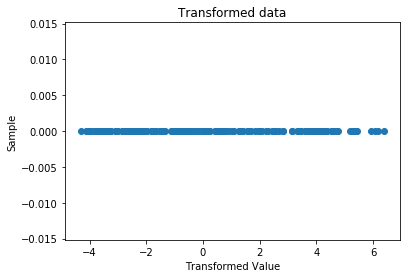

In [54]:
#10.Plot the transformed data.
plt.scatter(data_transformed,[0]*data_transformed.shape[0])
plt.ylabel('Sample')
plt.xlabel('Transformed Value')
plt.title('Transformed data')
plt.show()

Text(0.5, 1.0, 'Transformed data')

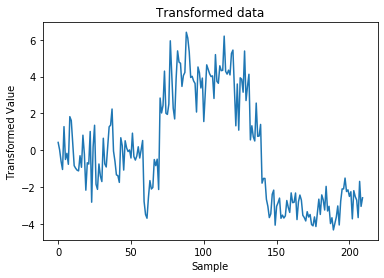

In [53]:
plt.plot(data_transformed)
plt.xlabel('Sample')
plt.ylabel('Transformed Value')
plt.title('Transformed data')

>**Observations**<br>In the first plot we can observe the data has been transformed to a lower-dimensional  space and only  the features of interest were kept. It's worth noting that after performing the transformation, the model still describes the original shape of the data, a line(or follows a linear trend). The second plot aims to illustrate how this points move along the y axis. 

#### Restoring the compressed dataset

In [10]:
#11.Restore the transformed data to the original dataspace.
data_restored = model.inverse_transform(data_transformed)

In [37]:
data_restored

array([[15.2705922 ,  5.68986779,  0.87307296],
       [14.86879642,  5.63161734,  0.87110288],
       [14.25372732,  5.54244752,  0.86808707],
       [13.81764099,  5.47922578,  0.86594886],
       [16.11770384,  5.81267805,  0.87722651],
       [14.35531385,  5.55717505,  0.86858517],
       [14.68398411,  5.60482412,  0.8701967 ],
       [14.09568645,  5.5195355 ,  0.86731217],
       [16.65355308,  5.89036294,  0.87985388],
       [16.44353661,  5.85991574,  0.87882413],
       [15.26362808,  5.68885817,  0.87303881],
       [14.01983566,  5.50853901,  0.86694026],
       [13.88290314,  5.48868718,  0.86626885],
       [13.78079144,  5.4738835 ,  0.86576818],
       [13.74203453,  5.46826471,  0.86557814],
       [14.55603673,  5.58627491,  0.86956935],
       [13.93555179,  5.49631993,  0.866527  ],
       [15.6583887 ,  5.7460887 ,  0.8749744 ],
       [14.64311647,  5.59889932,  0.86999632],
       [12.70667826,  5.31816364,  0.86050159],
       [14.17829206,  5.53151127,  0.867

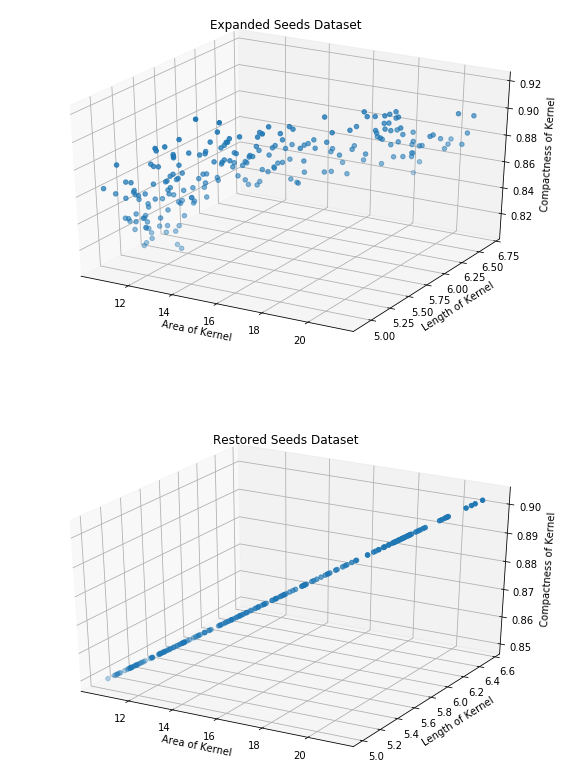

In [12]:
#12.Plot the restored data in three dimensions in one subplot and the original data in a second subplot to visualize the effect of removing some of the variance.
fig = plt.figure(figsize=(10, 14))
# Original Data
ax = fig.add_subplot(211, projection='3d')
ax.scatter(df['A'], df['LK'], df['C'], label='Original Data');
ax.set_xlabel('Area of Kernel');
ax.set_ylabel('Length of Kernel');
ax.set_zlabel('Compactness of Kernel');
ax.set_title('Expanded Seeds Dataset');
# Transformed Data
ax = fig.add_subplot(212, projection='3d')
ax.scatter(data_restored[:,0], data_restored[:,1], \
           data_restored[:,2], label='Restored Data');
ax.set_xlabel('Area of Kernel');
ax.set_ylabel('Length of Kernel');
ax.set_zlabel('Compactness of Kernel');
ax.set_title('Restored Seeds Dataset');

>**Observations:**<br>
With the important features pointed out by the model, it can be observed that as the compactness of the wheat kernel increases, so does the area.